In [245]:
import cv2
from skimage.morphology import reconstruction
from matplotlib import pyplot as plt
import numpy as np

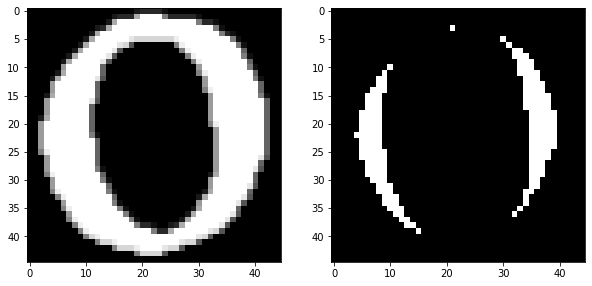

In [251]:
#Read image file
raw = cv2.imread("text_frombook.png")
raw = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
_, raw = cv2.threshold(raw, 200, 255, cv2.THRESH_BINARY)
raw_binary = (raw/255).astype(np.uint8)

kernel_o = cv2.imread("structuring_element_o.png")
kernel_o  = cv2.cvtColor(kernel_o , cv2.COLOR_BGR2GRAY)
kernel_erosion_o  = cv2.erode(kernel_o , kernel=np.ones((5,5),np.uint8), iterations = 1)
_, kernel_erosion_o  = cv2.threshold(kernel_erosion_o , 150, 255, cv2.THRESH_BINARY)
kernel_erosion_o  = (kernel_erosion_o /255).astype(np.uint8)

fig = plt.figure(figsize=(10,25))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(kernel_o , cmap='gray')
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(kernel_erosion_o , cmap='gray')
plt.show()

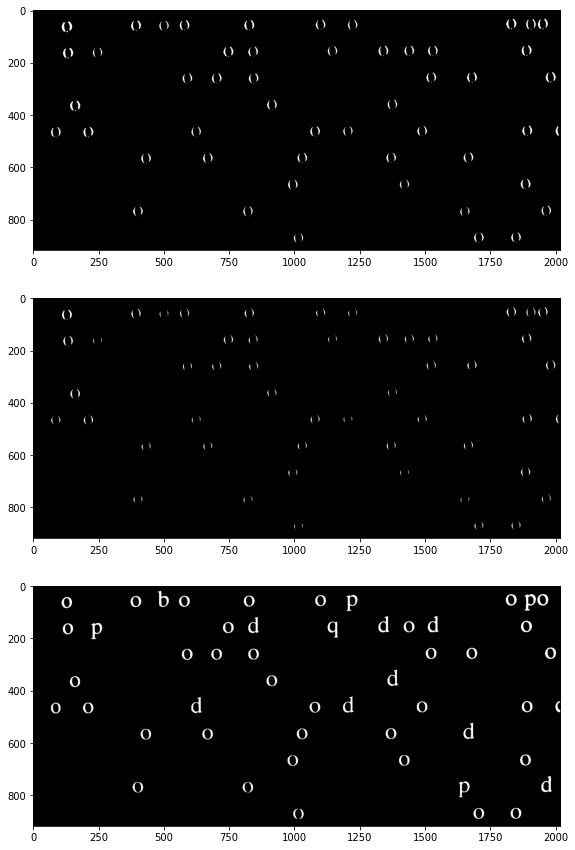

In [256]:
image_opening_o  = cv2.morphologyEx(raw, cv2.MORPH_OPEN, kernel_erosion_o )
image_opening_o  = (image_opening_o /255).astype(np.uint8)

mask_o  = cv2.erode(src=image_opening_o , kernel=np.ones((3,3),np.uint8), iterations=1)

image_reconstruct1 = reconstruction(mask_o , raw_binary)

fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(3, 1, 1)
ax1.imshow(image_opening_o , cmap='gray')
ax2 = fig.add_subplot(3, 1, 2)
ax2.imshow(mask_o , cmap='gray')
ax3 = fig.add_subplot(3, 1, 3)
ax3.imshow(image_reconstruct1, cmap='gray')

In [248]:
kernel_l = cv2.imread("structuring_element_l.png")
kernel_l  = cv2.cvtColor(kernel_l , cv2.COLOR_BGR2GRAY)
kernel_erosion_l = kernel_l
_, kernel_erosion_l  = cv2.threshold(kernel_erosion_l, 150, 255, cv2.THRESH_BINARY)
kernel_erosion_l  = (kernel_erosion_l /255).astype(np.uint8)

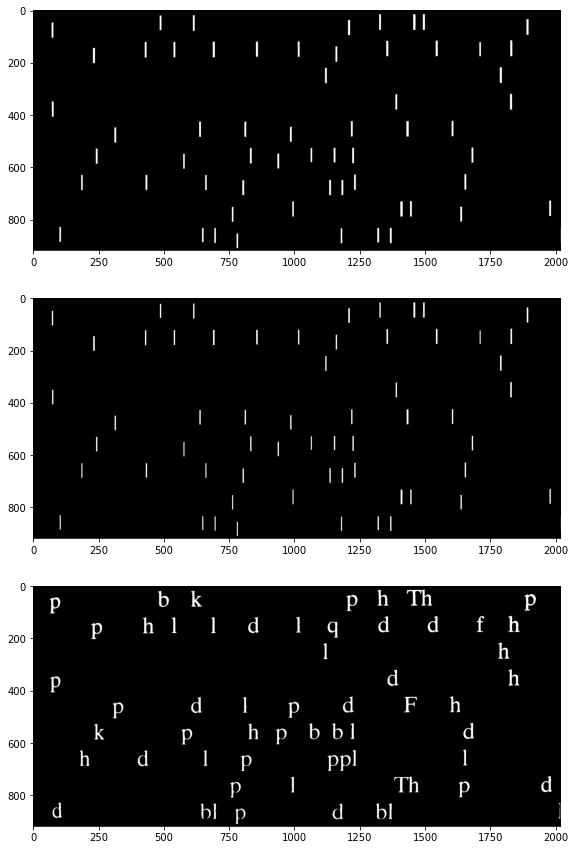

In [257]:
image_opening_l  = cv2.morphologyEx(raw, cv2.MORPH_OPEN, kernel_erosion_l)
image_opening_l  = (image_opening_l /255).astype(np.uint8)

mask_l  = cv2.erode(src=image_opening_l, kernel=np.ones((3,3),np.uint8), iterations=1)

image_reconstruct2 = reconstruction(mask_l , raw_binary)

fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(3, 1, 1)
ax1.imshow(image_opening_l , cmap='gray')
ax2 = fig.add_subplot(3, 1, 2)
ax2.imshow(mask_l , cmap='gray')
ax3 = fig.add_subplot(3, 1, 3)
ax3.imshow(image_reconstruct2, cmap='gray')

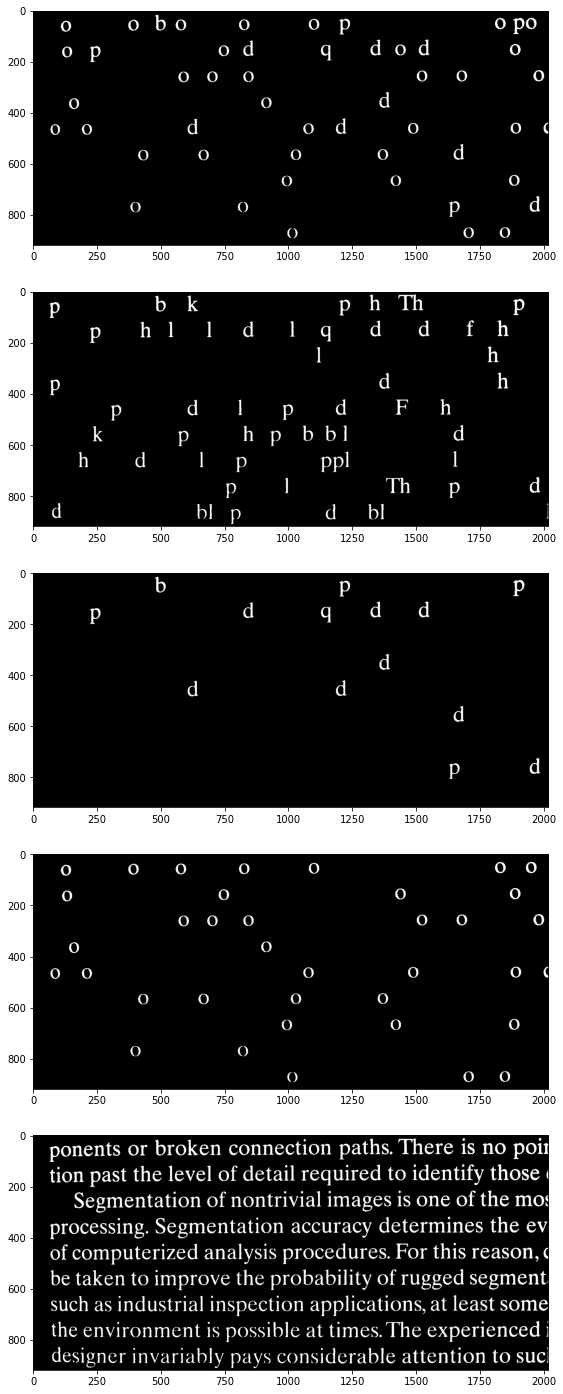

In [260]:
other = np.logical_and(image_reconstruct1, image_reconstruct2)
img_o = image_reconstruct1 - other

fig = plt.figure(figsize=(20,25))
ax1 = fig.add_subplot(5, 1, 1)
ax1.imshow(image_reconstruct1 , cmap='gray')
ax2 = fig.add_subplot(5, 1, 2)
ax2.imshow(image_reconstruct2 , cmap='gray')
ax3 = fig.add_subplot(5, 1, 3)
ax3.imshow(other, cmap='gray')
ax4 = fig.add_subplot(5, 1, 4)
ax4.imshow(img_o, cmap='gray')
ax5 = fig.add_subplot(5, 1, 5)
ax5.imshow(raw_binary, cmap='gray')